## GOAL: CHECK IF NEWS AND TWEETS ARE CORRELATED 

Correlation coefficients used are: Pearson, Spearman, Kendall, CCF for every lag    
Level of confidence for every coefficient is 95%

In [88]:
import pandas as pd

## VADER

In [92]:
news_vader = pd.read_csv('sentiment_index/news_vader_score.csv', index_col=[0])
news_vader

,vader_score
date,
2020-01-01,0.169288
2020-01-02,0.144309
2020-01-03,0.107039
2020-01-04,0.012900
2020-01-05,-0.014406
...,...
2020-08-24,0.048212
2020-08-25,0.061023
2020-08-26,0.062438


In [94]:
tweets_vader = pd.read_csv('sentiment_index/tweets_vader_score.csv', index_col=[0])
tweets_vader

,vader_score
date,
2020-01-01,0.086978
2020-01-02,0.082749
2020-01-03,0.007559
2020-01-04,-0.014918
2020-01-05,0.013048
...,...
2020-08-26,0.097091
2020-08-27,0.123987
2020-08-28,0.137380


In [95]:
#merge on date
vader_nt=tweets_vader.merge(news_vader, on=['date'])
vader_nt

,vader_score_x,vader_score_y
date,,
2020-01-01,0.086978,0.169288
2020-01-02,0.082749,0.144309
2020-01-03,0.007559,0.107039
2020-01-04,-0.014918,0.012900
2020-01-05,0.013048,-0.014406
...,...,...
2020-08-24,0.078811,0.048212
2020-08-25,0.127827,0.061023
2020-08-26,0.097091,0.062438


In [117]:
#level of agreement: enconding labels considering threshold = 0.025

vader_nt['x_labels']=''
vader_nt['y_labels']=''

vader_nt.loc[vader_nt["vader_score_x"]>0.025, "x_labels"] = 1
vader_nt.loc[vader_nt["vader_score_x"]<-0.025, "x_labels"] = -1
vader_nt.loc[(vader_nt["vader_score_x"]> -0.025) & (vader_nt["vader_score_x"] <0.025), "x_labels"] = 0

vader_nt.loc[vader_nt["vader_score_y"]>0.025, "y_labels"] = 1
vader_nt.loc[vader_nt["vader_score_y"]<-0.025, "y_labels"] = -1
vader_nt.loc[(vader_nt["vader_score_y"]> -0.025) & (vader_nt["vader_score_y"] <0.025), "y_labels"] = 0

vader_nt

,vader_score_x,vader_score_y,x_labels,y_labels
date,,,,
2020-01-01,0.086978,0.169288,1,1
2020-01-02,0.082749,0.144309,1,1
2020-01-03,0.007559,0.107039,0,1
2020-01-04,-0.014918,0.012900,0,0
2020-01-05,0.013048,-0.014406,0,0
...,...,...,...,...
2020-08-24,0.078811,0.048212,1,1
2020-08-25,0.127827,0.061023,1,1
2020-08-26,0.097091,0.062438,1,1


In [118]:
vader_nt['comparison'] = vader_nt['x_labels'] == vader_nt['y_labels']
vader_nt['comparison'].value_counts()

True     140
False     95
Name: comparison, dtype: int64

In [119]:
vader_nt['comparison'].value_counts(normalize=True)

True     0.595745
False    0.404255
Name: comparison, dtype: float64

In [96]:
from scipy.stats import pearsonr
pearsonr(vader_nt['vader_score_x'],vader_nt['vader_score_y'])

(-0.21198820288886638, 0.0010768839216471855)

In [97]:
from pingouin import corr
corr(vader_nt['vader_score_x'],vader_nt['vader_score_y'], method= 'pearson')

,n,r,CI95%,p-val,BF10,power
pearson,235,-0.211988,"[-0.33, -0.09]",0.001077,16.552,0.907411


RESULT: NEGATIVE CORRELATION

In [98]:
from scipy.stats import spearmanr
spearmanr(vader_nt['vader_score_x'],vader_nt['vader_score_y'])

SpearmanrResult(correlation=-0.28391263742868494, pvalue=9.852238610369549e-06)

In [99]:
corr(vader_nt['vader_score_x'],vader_nt['vader_score_y'], method= 'spearman')

,n,r,CI95%,p-val,power
spearman,235,-0.283913,"[-0.4, -0.16]",0.00001,0.993707


In [100]:
import scipy.stats as stats
stats.kendalltau(vader_nt['vader_score_x'],vader_nt['vader_score_y'])

KendalltauResult(correlation=-0.1868339698126932, pvalue=2.0044697164669517e-05)

In [101]:
corr(vader_nt['vader_score_x'],vader_nt['vader_score_y'], method= 'kendall')

,n,r,CI95%,p-val,power
kendall,235,-0.186834,"[-0.31, -0.06]",0.00002,0.822551


In [102]:
import statsmodels.api as sm
#calculate cross correlation
a=sm.tsa.stattools.ccf(vader_nt['vader_score_x'],vader_nt['vader_score_y'], adjusted=False)
a

array([-2.11988203e-01, -2.61092480e-01, -1.70313529e-01, -2.37661927e-01,
       -2.49772355e-01, -2.05030301e-01, -2.66987351e-01, -2.36337743e-01,
       -1.31017459e-01, -2.29037179e-01, -2.03941003e-01, -2.44960181e-01,
       -2.87063594e-01, -3.29267339e-01, -3.21759514e-01, -2.11642901e-01,
       -1.59551591e-01, -2.54430902e-01, -1.91279219e-01, -2.72629624e-01,
       -3.22260893e-01, -2.10906395e-01, -2.98414980e-01, -3.08700243e-01,
       -2.57939546e-01, -2.41632893e-01, -3.64190199e-01, -2.60220289e-01,
       -2.63849333e-01, -2.50256189e-01, -1.98528507e-01, -2.35929959e-01,
       -2.61115358e-01, -2.64901493e-01, -2.60990347e-01, -1.93432818e-01,
       -1.81482563e-01, -1.49798133e-01, -1.57030514e-01, -2.29159115e-01,
       -2.89698760e-01, -2.12987181e-01, -1.90229432e-01, -1.23197452e-01,
       -1.36236931e-01, -8.16296137e-02, -1.20631602e-01, -6.97325692e-02,
       -1.99734675e-01, -1.06084395e-01, -1.33231907e-01, -1.22854527e-01,
       -7.89747362e-02, -

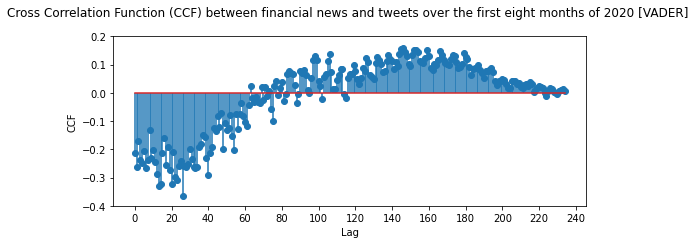

In [130]:
import matplotlib.pylab as plt
import numpy as np
plt.stem(a)
plt.xlabel('Lag')
plt.ylabel('CCF')
plt.title("Cross Correlation Function (CCF) between financial news and tweets over the first eight months of 2020 [VADER] ", pad=20)
plt.axis([None, None, -0.4, 0.2])
plt.xticks(np.arange(0, 250, step=20)) 
plt.savefig('images/corr_f_n_vader.png',  bbox_inches='tight')

## FINBERT

In [104]:
news_finbert = pd.read_csv('sentiment_index/news_finbert_score.csv')
news_finbert

,date,finbert_score
0,2020-01-01,0.294918
1,2020-01-02,0.231394
2,2020-01-03,0.288113
3,2020-01-04,0.118191
4,2020-01-05,-0.012384
...,...,...
236,2020-08-24,0.099178
237,2020-08-25,0.104420
238,2020-08-26,0.105442
239,2020-08-27,0.139035


In [105]:
tweets_finbert = pd.read_csv('sentiment_index/tweets_finbert_score.csv')
tweets_finbert

,date,finbert
0,2020-01-01,-0.029071
1,2020-01-02,0.097491
2,2020-01-03,0.042459
3,2020-01-04,-0.006438
4,2020-01-05,-0.014859
...,...,...
232,2020-08-26,0.116967
233,2020-08-27,0.112854
234,2020-08-28,0.152697
235,2020-08-29,0.108298


In [106]:
#merge on date
finbert_nt=tweets_finbert.merge(news_finbert, on=['date'])
finbert_nt.rename(columns = {'finbert':'tweets finbert', 'finbert_score': 'news finbert'}, inplace = True)
finbert_nt

,date,tweets finbert,news finbert
0,2020-01-01,-0.029071,0.294918
1,2020-01-02,0.097491,0.231394
2,2020-01-03,0.042459,0.288113
3,2020-01-04,-0.006438,0.118191
4,2020-01-05,-0.014859,-0.012384
...,...,...,...
230,2020-08-24,0.132048,0.099178
231,2020-08-25,0.119997,0.104420
232,2020-08-26,0.116967,0.105442
233,2020-08-27,0.112854,0.139035


In [120]:
#level of agreement: enconding labels considering threshold = 0

finbert_nt['tweet_labels']=''
finbert_nt['news_labels']=''

finbert_nt.loc[finbert_nt["tweets finbert"]>0, "tweet_labels"] = 1
finbert_nt.loc[finbert_nt["tweets finbert"]<0, "tweet_labels"] = -1
finbert_nt.loc[finbert_nt["tweets finbert"]==0, "tweet_labels"] = 0

finbert_nt.loc[finbert_nt["news finbert"]>0, "news_labels"] = 1
finbert_nt.loc[finbert_nt["news finbert"]<0, "news_labels"] = -1
finbert_nt.loc[finbert_nt["news finbert"]==0, "news_labels"] = 0

finbert_nt

,date,tweets finbert,news finbert,tweet_labels,news_labels
0,2020-01-01,-0.029071,0.294918,-1,1
1,2020-01-02,0.097491,0.231394,1,1
2,2020-01-03,0.042459,0.288113,1,1
3,2020-01-04,-0.006438,0.118191,-1,1
4,2020-01-05,-0.014859,-0.012384,-1,-1
...,...,...,...,...,...
230,2020-08-24,0.132048,0.099178,1,1
231,2020-08-25,0.119997,0.104420,1,1
232,2020-08-26,0.116967,0.105442,1,1
233,2020-08-27,0.112854,0.139035,1,1


In [121]:
finbert_nt['comparison'] = finbert_nt['tweet_labels'] == finbert_nt['news_labels']

In [122]:
finbert_nt['comparison'].value_counts(normalize=True)

True     0.655319
False    0.344681
Name: comparison, dtype: float64

In [123]:
finbert_nt['comparison'].value_counts()

True     154
False     81
Name: comparison, dtype: int64

In [107]:
finbert_nt.corr() 

,tweets finbert,news finbert
tweets finbert,1.000000,0.233807
news finbert,0.233807,1.000000


In [108]:
from scipy.stats import pearsonr
pearsonr(finbert_nt['tweets finbert'],finbert_nt['news finbert'])

(0.2338073468571945, 0.000299970569599506)

RESULT: POSITIVE CORRELATION

In [109]:
from scipy.stats import spearmanr
spearmanr(finbert_nt['tweets finbert'],finbert_nt['news finbert'])

SpearmanrResult(correlation=0.2247261192465221, pvalue=0.0005182909208203903)

In [110]:
import scipy.stats as stats
stats.kendalltau(finbert_nt['tweets finbert'],finbert_nt['news finbert'])

KendalltauResult(correlation=0.14861154051448988, pvalue=0.0006940371392432362)

In [111]:
import statsmodels.api as sm
#calculate cross correlation
o=sm.tsa.stattools.ccf(finbert_nt['tweets finbert'],finbert_nt['news finbert'], adjusted=False)
o

array([ 2.33807347e-01,  1.50672844e-01,  8.15605575e-02, -9.91736753e-02,
        3.70820340e-02,  2.35785489e-02,  4.82846484e-02,  1.15115903e-01,
        1.03252997e-01,  3.58125609e-02, -2.91375137e-03, -1.51276481e-02,
       -2.72347741e-03, -3.89005081e-02,  6.16399313e-02,  1.20794548e-02,
       -1.38187421e-02, -7.66788582e-02, -1.33809396e-01, -1.24178269e-01,
       -3.83780912e-02,  1.74912964e-02, -7.14328309e-02, -1.62215239e-01,
       -1.72547652e-01, -1.37768680e-01, -9.98838033e-02, -4.89053684e-02,
       -6.44710261e-02, -9.09186371e-02, -1.39031832e-01, -8.68891550e-02,
       -1.21765291e-01, -1.03497931e-01, -2.90323842e-02, -6.17801580e-02,
       -1.03503228e-01, -1.32998264e-01, -1.39960368e-01, -1.23057401e-01,
       -1.24470624e-01, -1.19604405e-01, -1.64116732e-01, -1.45285838e-01,
       -1.70508808e-01, -1.78118166e-01, -2.13419153e-01, -1.93130123e-01,
       -1.96050165e-01, -2.51076331e-01, -2.73010357e-01, -3.12935885e-01,
       -2.77356757e-01, -

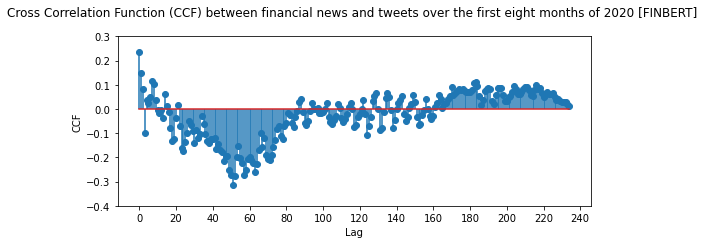

In [131]:
import matplotlib.pylab as plt
import numpy as np
plt.stem(o)
plt.xlabel('Lag')
plt.ylabel('CCF')
plt.title("Cross Correlation Function (CCF) between financial news and tweets over the first eight months of 2020 [FINBERT] ", pad=20)
plt.axis([None, None, -0.4, 0.3])
plt.xticks(np.arange(0, 250, step=20)) 
plt.savefig('images/corr_f_n_finbert.png',  bbox_inches='tight')

In [113]:
from pingouin import corr

In [114]:
corr(finbert_nt['tweets finbert'],finbert_nt['news finbert'], method= 'pearson')

,n,r,CI95%,p-val,BF10,power
pearson,235,0.233807,"[0.11, 0.35]",0.0003,54.002,0.953074


In [115]:
corr(finbert_nt['tweets finbert'],finbert_nt['news finbert'], method= 'spearman')

,n,r,CI95%,p-val,power
spearman,235,0.224726,"[0.1, 0.34]",0.000518,0.936883


In [116]:
corr(finbert_nt['tweets finbert'],finbert_nt['news finbert'], method= 'kendall')

,n,r,CI95%,p-val,power
kendall,235,0.148612,"[0.02, 0.27]",0.000694,0.62733
